In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
HR_Attrition=pd.read_csv("HR_Attrition_IBM.csv")
HR_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [96]:
HR_Attrition.shape

(1470, 35)

In [97]:
HR_Attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [98]:
HR_Attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [99]:
HR_Attrition['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [100]:
HR_Attrition.loc[HR_Attrition["Attrition"]== " "] #for checking empty value

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There is no empty value in the target variable

### Making DataFrame for the Nominal Data


In [101]:
HR_Attrition_nominal=HR_Attrition[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PerformanceRating','RelationshipSatisfaction',
                                   'StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].copy()
HR_Attrition_nominal

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,...,8,Yes,3,1,0,0,1,4,0,5
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,...,1,No,4,4,1,3,3,7,1,7
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,...,6,Yes,3,2,0,3,3,0,0,0
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,...,1,Yes,3,3,0,3,3,7,3,0
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,...,9,No,3,4,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,3,Male,4,2,Laboratory Technician,...,4,No,3,3,1,3,3,2,0,3
1466,No,Travel_Rarely,Research & Development,1,Medical,4,Male,2,3,Healthcare Representative,...,4,No,3,1,1,5,3,7,1,7
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,...,1,Yes,4,2,1,0,3,2,0,3
1468,No,Travel_Frequently,Sales,3,Medical,4,Male,2,2,Sales Executive,...,2,No,3,4,0,3,2,6,0,8


In [102]:
HR_Attrition_nominal.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Univariate Analysis

### Vizualization of the data :

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

No     1233
Yes     237
Name: Attrition, dtype: int64


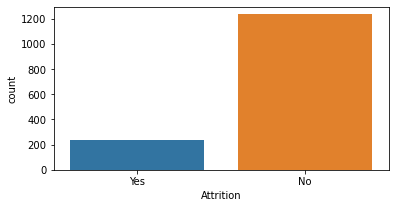

In [103]:
countplt,ax=plt.subplots(figsize=(6,3))
ax=sns.countplot(x="Attrition", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["Attrition"].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


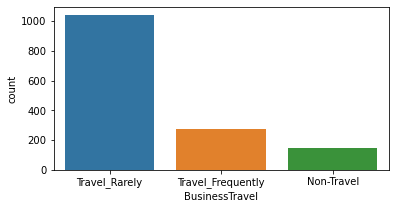

In [104]:
countplt,ax=plt.subplots(figsize=(6,3))
ax=sns.countplot(x="BusinessTravel", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["BusinessTravel"].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


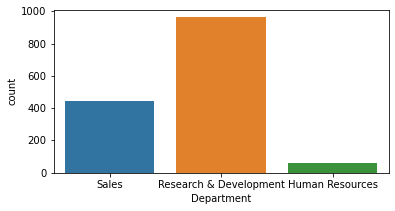

In [105]:
countplt,ax=plt.subplots(figsize=(6,3))
ax=sns.countplot(x="Department", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["Department"].value_counts())

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


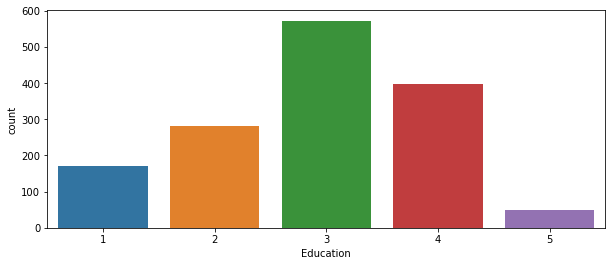

In [106]:
countplt,ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(x="Education", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["Education"].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


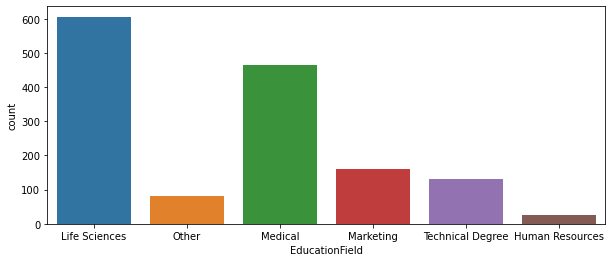

In [107]:
countplt,ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(x="EducationField", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["EducationField"].value_counts())

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


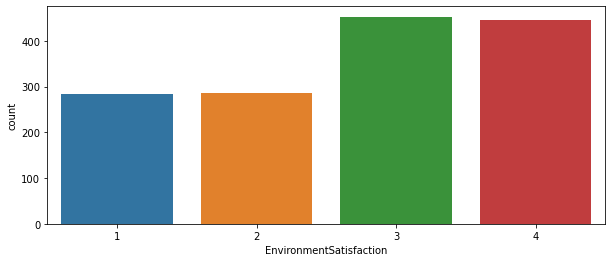

In [108]:
countplt,ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(x="EnvironmentSatisfaction", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["EnvironmentSatisfaction"].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


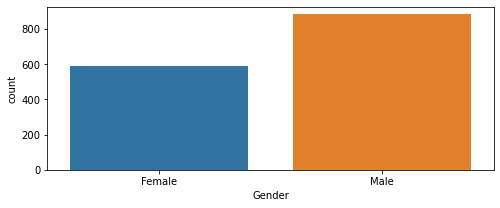

In [109]:
countplt,ax=plt.subplots(figsize=(8,3))
ax=sns.countplot(x="Gender", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["Gender"].value_counts())

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


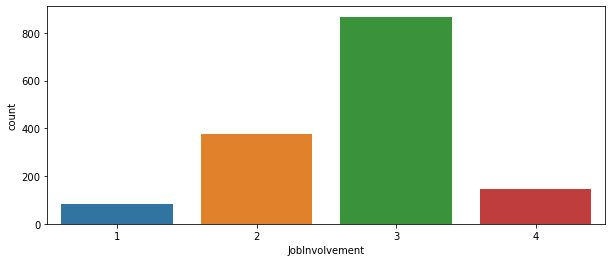

In [110]:
countplt,ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(x="JobInvolvement", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["JobInvolvement"].value_counts())

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


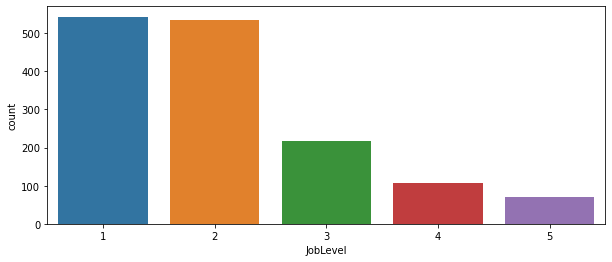

In [111]:
countplt,ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(x="JobLevel", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["JobLevel"].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


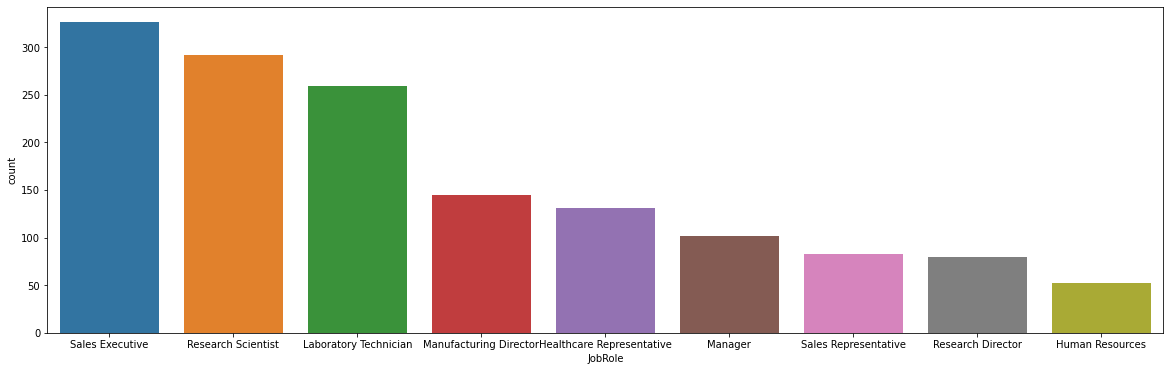

In [112]:
countplt,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x="JobRole", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["JobRole"].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


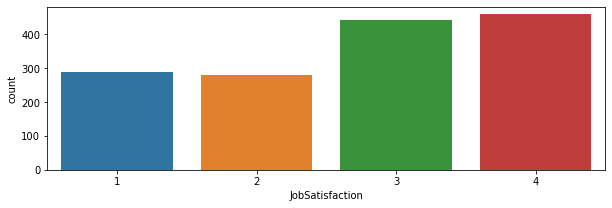

In [113]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="JobSatisfaction", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["JobSatisfaction"].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


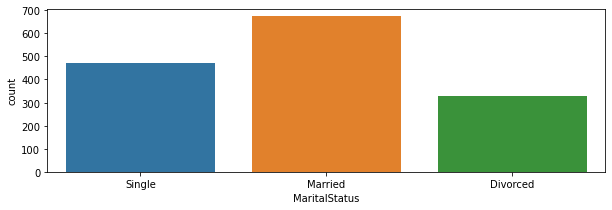

In [114]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="MaritalStatus", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["MaritalStatus"].value_counts())

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


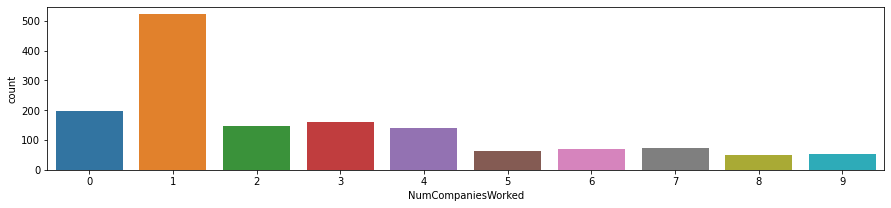

In [115]:
countplt,ax=plt.subplots(figsize=(15,3))
ax=sns.countplot(x="NumCompaniesWorked", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["NumCompaniesWorked"].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


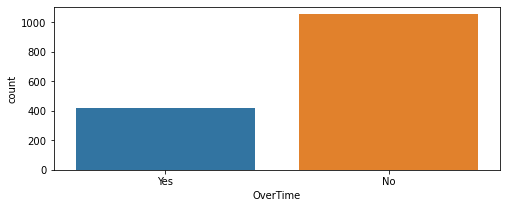

In [116]:
countplt,ax=plt.subplots(figsize=(8,3))
ax=sns.countplot(x="OverTime", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["OverTime"].value_counts())

3    1244
4     226
Name: PerformanceRating, dtype: int64


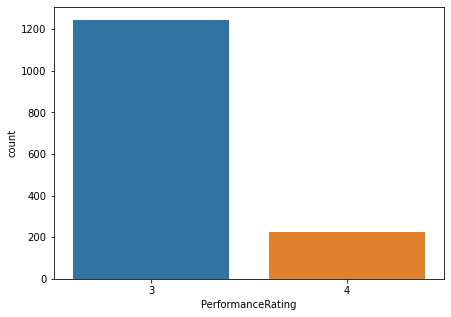

In [117]:
countplt,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x="PerformanceRating", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["PerformanceRating"].value_counts())

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


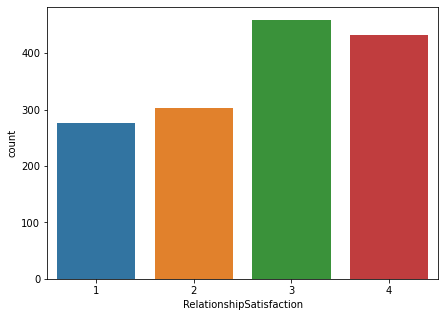

In [118]:
countplt,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x="RelationshipSatisfaction", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["RelationshipSatisfaction"].value_counts())

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


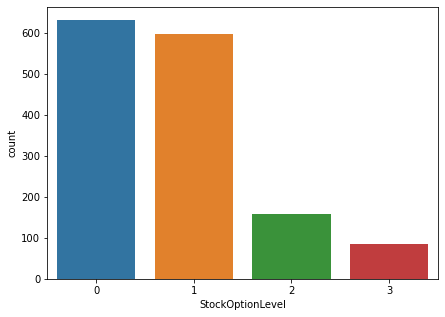

In [119]:
countplt,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x="StockOptionLevel", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["StockOptionLevel"].value_counts())

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


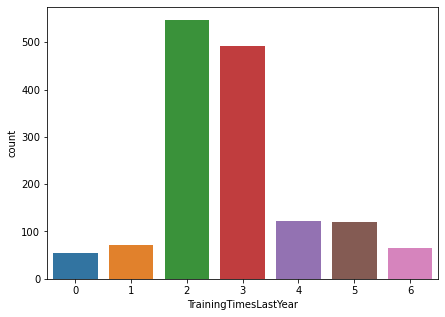

In [120]:
countplt,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x="TrainingTimesLastYear", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["TrainingTimesLastYear"].value_counts())

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


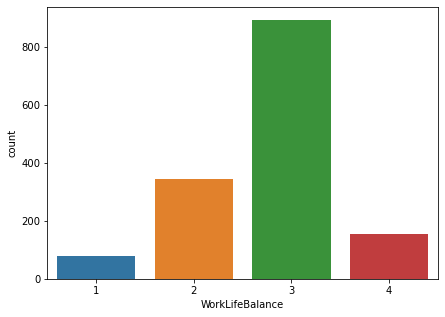

In [121]:
countplt,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(x="WorkLifeBalance", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["WorkLifeBalance"].value_counts())

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


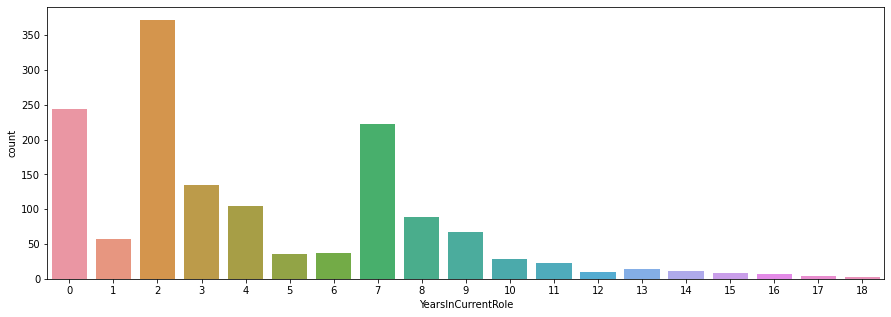

In [122]:

countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="YearsInCurrentRole", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["YearsInCurrentRole"].value_counts())

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


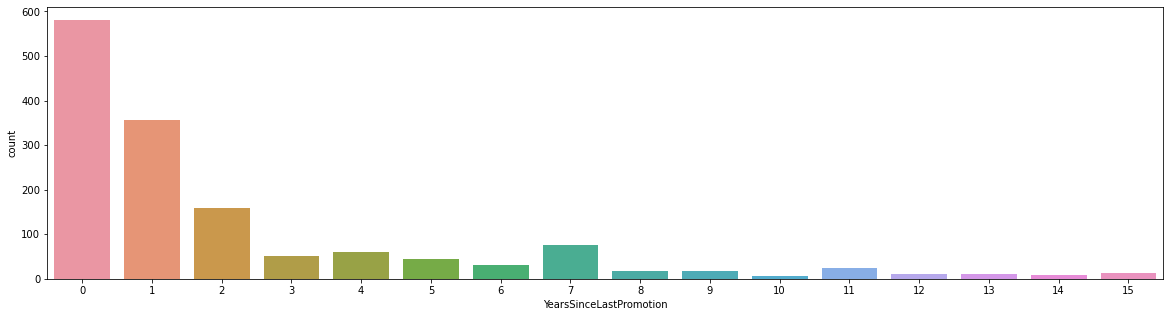

In [123]:

countplt,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x="YearsSinceLastPromotion", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["YearsSinceLastPromotion"].value_counts())

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


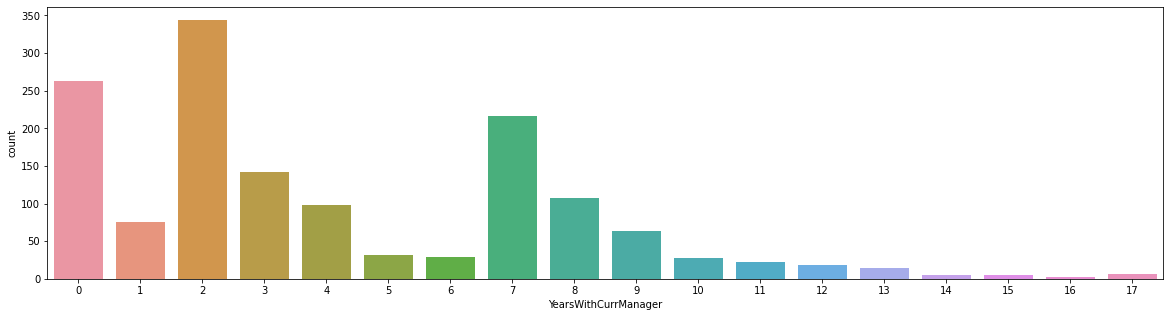

In [124]:

countplt,ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x="YearsWithCurrManager", data=HR_Attrition_nominal)
print(HR_Attrition_nominal["YearsWithCurrManager"].value_counts())

### Label Encoding String Data

In [125]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [126]:
for i in HR_Attrition.columns:
    if HR_Attrition[i].dtypes=="object":
        HR_Attrition[i]=enc.fit_transform(HR_Attrition[i].values.reshape(-1,1))

In [127]:
HR_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


Since our target variable is Attrition which is having class imbalance problem

### Applying SMOTE for class imbalance

In [128]:
import sklearn
sklearn.__version__

'1.0'

In [129]:
import numpy 
numpy.__version__

'1.19.2'

In [130]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda3\lib\site-packages (0.8.1)


In [131]:
HR_Attrition_y=HR_Attrition.iloc[:,1]
HR_Attrition_y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [132]:
HR_Attrition_x=HR_Attrition.drop('Attrition',axis=1, inplace=True)

In [133]:
HR_Attrition_x=HR_Attrition
HR_Attrition_x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
smt=SMOTE()
HR_Attrition_X,HR_Attrition_Y=smt.fit_resample(HR_Attrition_x,HR_Attrition_y)

In [136]:
HR_Attrition_X.value_counts()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender    HourlyRate  JobInvolvement  JobLevel  JobRole   JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
60   2.0             1179       2.000000    16                4          2.000000        1              732             1                        1.000000  84          3               2         7.000000  1                2.0            5405           11924        8                   0.0     0.000000  14                 3                  4                         80             0                 10                 1                      3                2   

In [137]:
HR_Attrition_Y.value_counts()

0.0    1233
1.0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

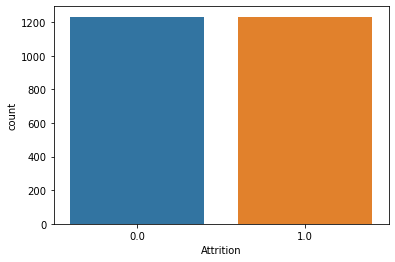

In [138]:
sns.countplot(HR_Attrition_Y)

### Checking the distribution of the continous value or the float type columns 

In [139]:
HR_Attrition_continuous=HR_Attrition_x[["Age","DailyRate","DistanceFromHome","EmployeeNumber","HourlyRate","MonthlyIncome","MonthlyRate","PercentSalaryHike","TotalWorkingYears","YearsAtCompany"]].copy()

In [140]:
HR_Attrition_continuous.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

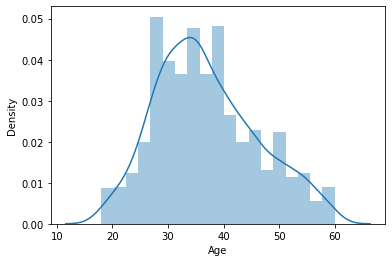

In [141]:
sns.distplot(HR_Attrition_continuous['Age'],kde=True)

Here plot seems to be normal 

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

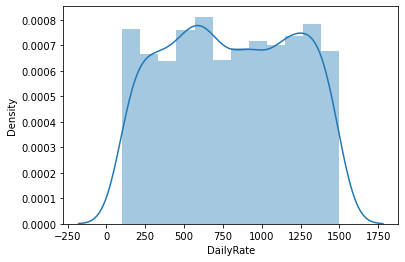

In [142]:
sns.distplot(HR_Attrition_continuous['DailyRate'],kde=True)

In this plot we can say that graph is uniform 

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

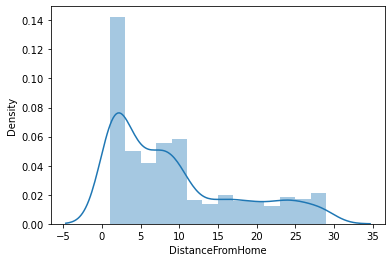

In [143]:
sns.distplot(HR_Attrition_continuous['DistanceFromHome'],kde=True)

In this plot we can say that the plot is right skewed (positively skewed)

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

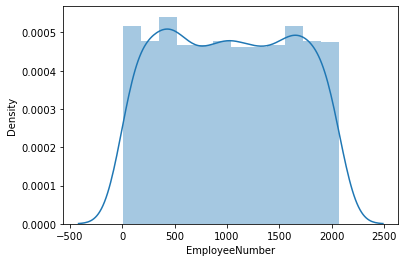

In [144]:
sns.distplot(HR_Attrition_continuous['EmployeeNumber'],kde=True)

In this plot graph seems to be uniform

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

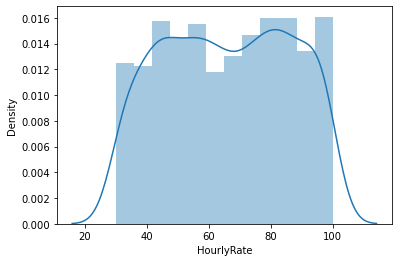

In [145]:
sns.distplot(HR_Attrition_continuous['HourlyRate'],kde=True)

In this plot graph seems to be uniform

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

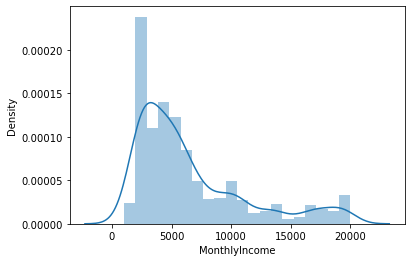

In [146]:
sns.distplot(HR_Attrition_continuous['MonthlyIncome'],kde=True)

In this plot we can say that the plot is right skewed (positively skewed)

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

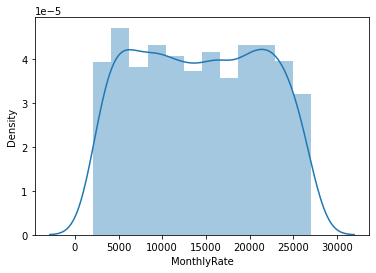

In [147]:
sns.distplot(HR_Attrition_continuous['MonthlyRate'],kde=True)

In this plot graph seems to be uniform

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

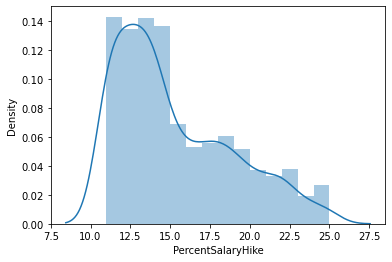

In [148]:
sns.distplot(HR_Attrition_continuous['PercentSalaryHike'],kde=True)

In this plot we can say that the plot is right skewed (positively skewed)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

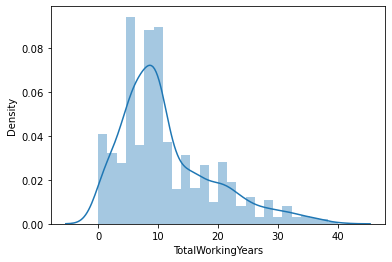

In [149]:
sns.distplot(HR_Attrition_continuous['TotalWorkingYears'],kde=True)

In this plot we can say that the plot is right skewed (positively skewed)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

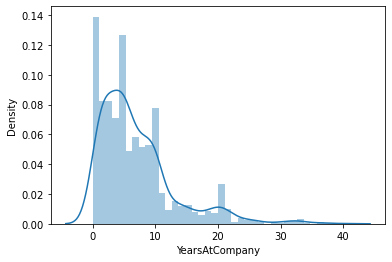

In [150]:
sns.distplot(HR_Attrition_continuous['YearsAtCompany'],kde=True)

In this plot we can say that the plot is right skewed (positively skewed)

## Outliers Check

<AxesSubplot:>

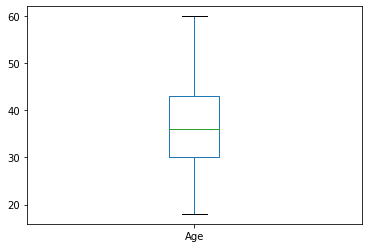

In [151]:
HR_Attrition_x['Age'].plot.box()

<AxesSubplot:>

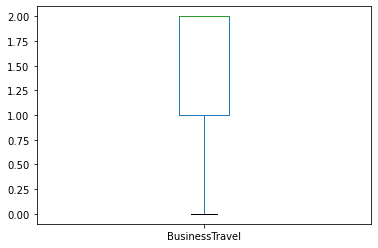

In [152]:
HR_Attrition_x['BusinessTravel'].plot.box()

<AxesSubplot:>

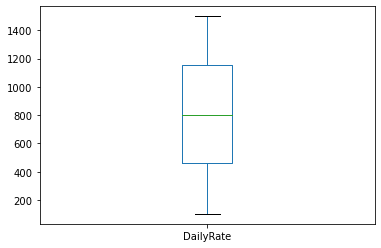

In [153]:
HR_Attrition_x['DailyRate'].plot.box()

<AxesSubplot:>

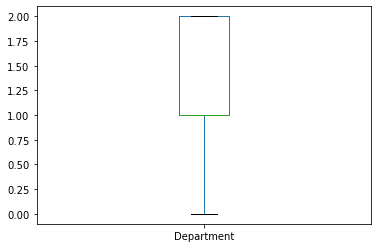

In [154]:
HR_Attrition_x['Department'].plot.box()

<AxesSubplot:>

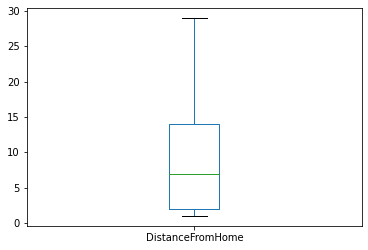

In [155]:
HR_Attrition_x['DistanceFromHome'].plot.box()

<AxesSubplot:>

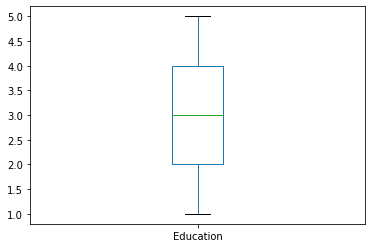

In [156]:
HR_Attrition_x['Education'].plot.box()

<AxesSubplot:>

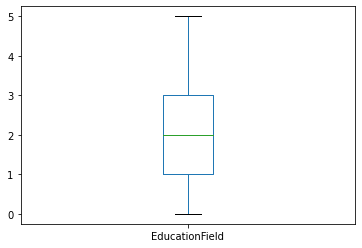

In [157]:
HR_Attrition_x['EducationField'].plot.box()

<AxesSubplot:>

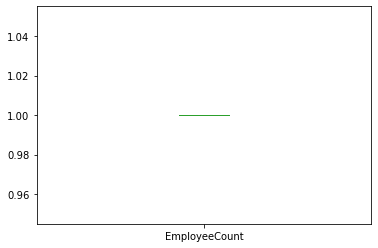

In [158]:
HR_Attrition_x['EmployeeCount'].plot.box()

<AxesSubplot:>

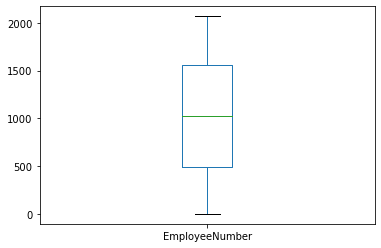

In [159]:
HR_Attrition_x['EmployeeNumber'].plot.box()

<AxesSubplot:>

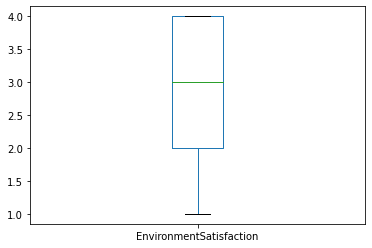

In [160]:
HR_Attrition_x['EnvironmentSatisfaction'].plot.box()

<AxesSubplot:>

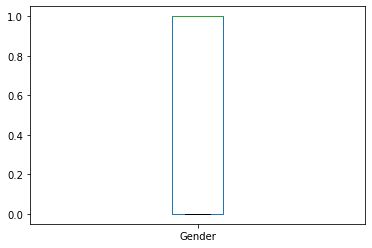

In [161]:
HR_Attrition_x['Gender'].plot.box()

<AxesSubplot:>

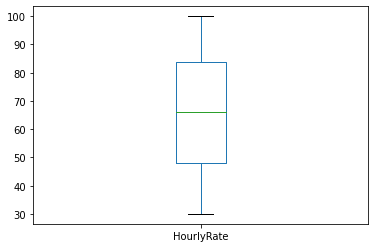

In [162]:
HR_Attrition_x['HourlyRate'].plot.box()

<AxesSubplot:>

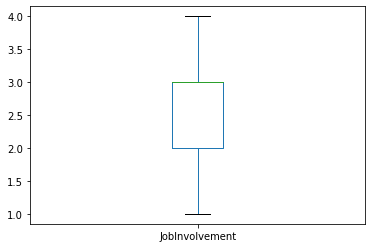

In [163]:
HR_Attrition_x['JobInvolvement'].plot.box()

<AxesSubplot:>

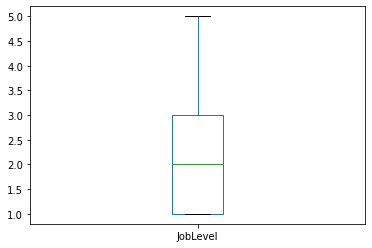

In [164]:
HR_Attrition_x['JobLevel'].plot.box()

<AxesSubplot:>

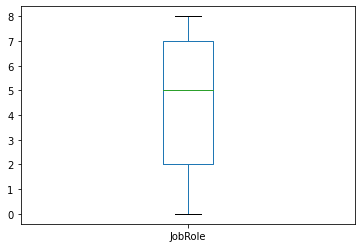

In [165]:
HR_Attrition_x['JobRole'].plot.box()

<AxesSubplot:>

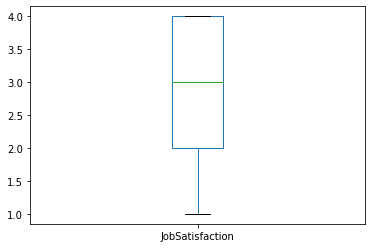

In [166]:
HR_Attrition_x['JobSatisfaction'].plot.box()

<AxesSubplot:>

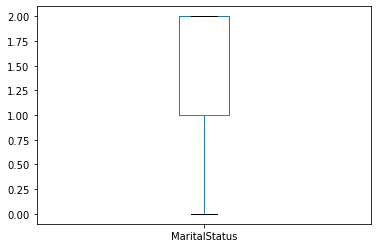

In [167]:
HR_Attrition_x['MaritalStatus'].plot.box()

<AxesSubplot:>

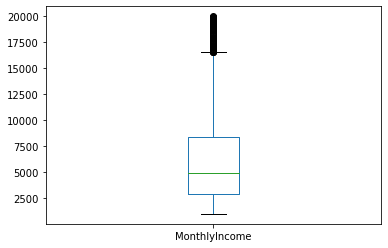

In [168]:
HR_Attrition_x['MonthlyIncome'].plot.box()

<AxesSubplot:>

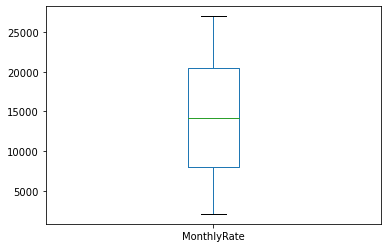

In [169]:
HR_Attrition_x['MonthlyRate'].plot.box()

<AxesSubplot:>

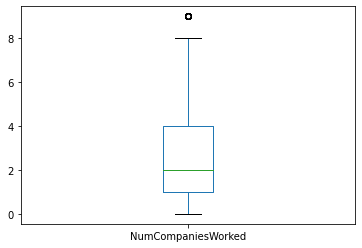

In [170]:
HR_Attrition_x['NumCompaniesWorked'].plot.box()

<AxesSubplot:>

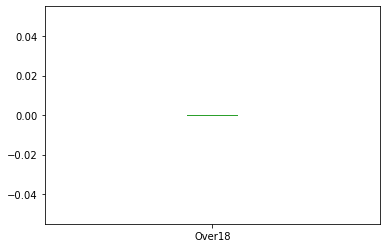

In [171]:
HR_Attrition_x['Over18'].plot.box()

<AxesSubplot:>

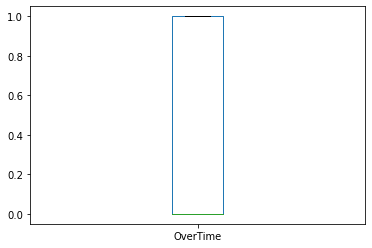

In [172]:
HR_Attrition_x['OverTime'].plot.box()

<AxesSubplot:>

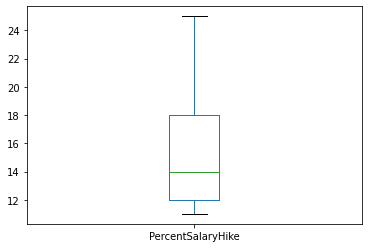

In [173]:
HR_Attrition_x['PercentSalaryHike'].plot.box()

<AxesSubplot:>

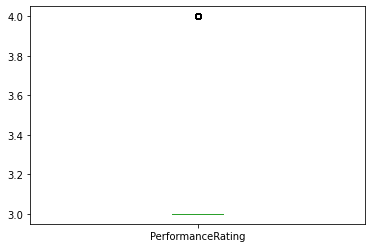

In [174]:
HR_Attrition_x['PerformanceRating'].plot.box()

<AxesSubplot:>

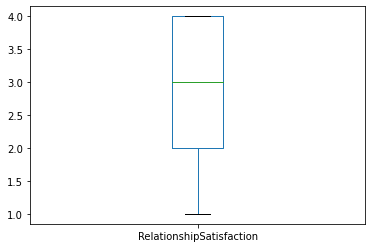

In [175]:
HR_Attrition_x['RelationshipSatisfaction'].plot.box()

<AxesSubplot:>

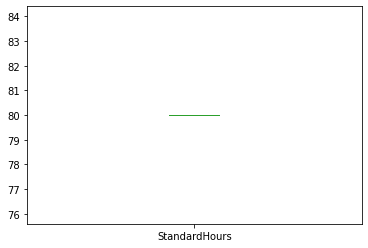

In [176]:
HR_Attrition_x['StandardHours'].plot.box()

<AxesSubplot:>

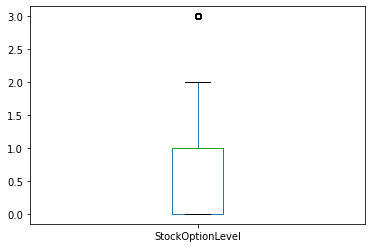

In [177]:
HR_Attrition_x['StockOptionLevel'].plot.box()

<AxesSubplot:>

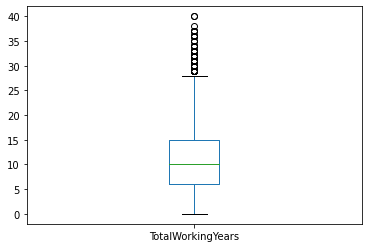

In [178]:
HR_Attrition_x['TotalWorkingYears'].plot.box()

<AxesSubplot:>

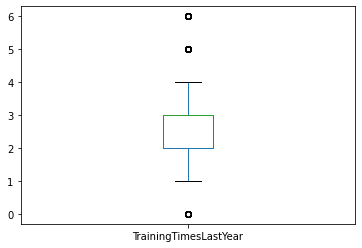

In [179]:
HR_Attrition_x['TrainingTimesLastYear'].plot.box()

<AxesSubplot:>

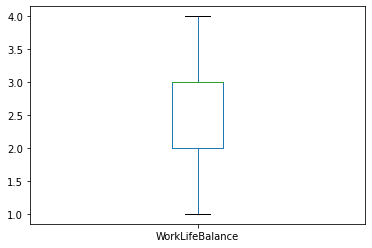

In [180]:
HR_Attrition_x['WorkLifeBalance'].plot.box()

<AxesSubplot:>

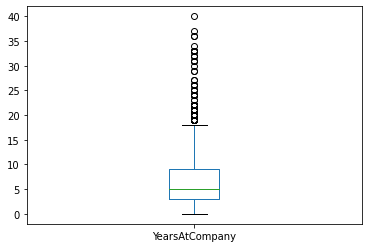

In [181]:
HR_Attrition_x['YearsAtCompany'].plot.box()

<AxesSubplot:>

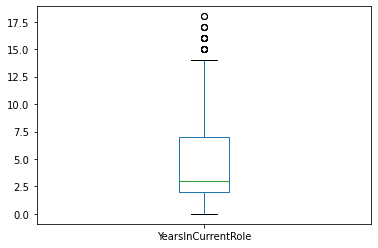

In [182]:
HR_Attrition_x['YearsInCurrentRole'].plot.box()

<AxesSubplot:>

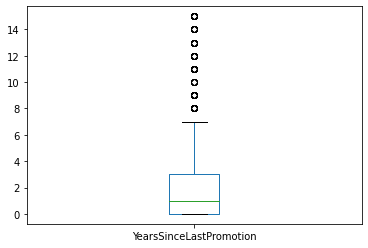

In [183]:
HR_Attrition_x['YearsSinceLastPromotion'].plot.box()

<AxesSubplot:>

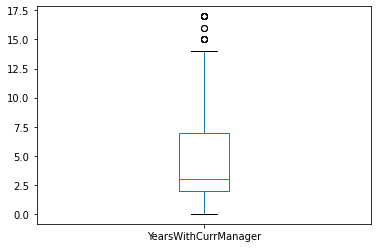

In [184]:
HR_Attrition_x['YearsWithCurrManager'].plot.box()

From the above boxplots we can say that Attrition,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,

TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have outliers 

## Bivariate Analysis

KeyError: 'Attrition'

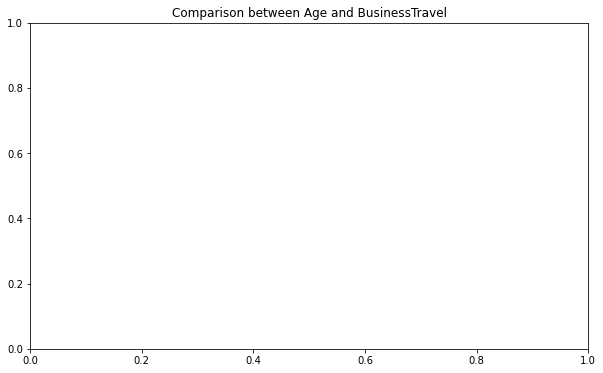

In [187]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Age and BusinessTravel')
sns.scatterplot(HR_Attrition_x['Age'], HR_Attrition_x['BusinessTravel'], hue=HR_Attrition_y['Attrition']);

KeyError: 'Attrition'

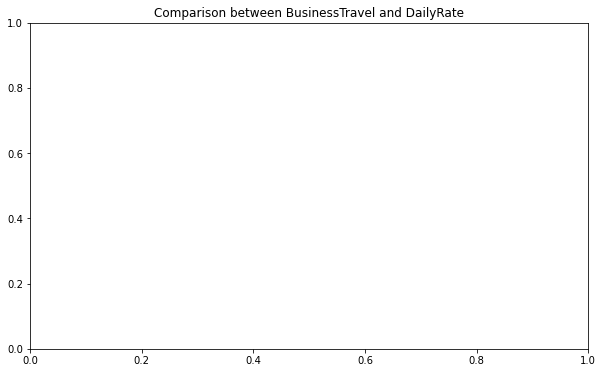

In [93]:
plt.figure(figsize=[10,6])
plt.title('Comparison between BusinessTravel and DailyRate')
sns.scatterplot(HR_Attrition['BusinessTravel'], HR_Attrition['DailyRate'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between DailyRate and Department')
sns.scatterplot(HR_Attrition['DailyRate'], HR_Attrition['Department'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Department and DistanceFromHome')
sns.scatterplot(HR_Attrition['Department'], HR_Attrition['DistanceFromHome'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between DistanceFromHome and Education')
sns.scatterplot(HR_Attrition['DistanceFromHome'], HR_Attrition['Education'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Education and EducationField')
sns.scatterplot(HR_Attrition['Education'], HR_Attrition['EducationField'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between EducationField and EmployeeCount')
sns.scatterplot(HR_Attrition['EducationField'], HR_Attrition['EmployeeCount'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  EmployeeCount and EmployeeNumber')
sns.scatterplot(HR_Attrition['EmployeeCount'], HR_Attrition['EmployeeNumber'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  EmployeeNumber and EnvironmentSatisfaction')
sns.scatterplot(HR_Attrition['EmployeeNumber'], HR_Attrition['EnvironmentSatisfaction'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  EnvironmentSatisfaction and Gender')
sns.scatterplot(HR_Attrition['EnvironmentSatisfaction'], HR_Attrition['Gender'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  Gender and HourlyRate')
sns.scatterplot(HR_Attrition['Gender'], HR_Attrition['HourlyRate'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  HourlyRate and JobInvolvement')
sns.scatterplot(HR_Attrition['HourlyRate'], HR_Attrition['JobInvolvement'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between JobInvolvement and JobLevel')
sns.scatterplot(HR_Attrition['JobInvolvement'], HR_Attrition['JobLevel'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  JobLevel and JobRole')
sns.scatterplot(HR_Attrition['JobLevel'], HR_Attrition['JobRole'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  JobLevel and JobSatisfaction')
sns.scatterplot(HR_Attrition['JobRole'], HR_Attrition['JobSatisfaction'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  JobSatisfaction and MaritalStatus')
sns.scatterplot(HR_Attrition['JobSatisfaction'], HR_Attrition['MaritalStatus'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between  MaritalStatus and MonthlyIncome')
sns.scatterplot(HR_Attrition['MaritalStatus'], HR_Attrition['MonthlyIncome'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between MonthlyIncome and MonthlyRate')
sns.scatterplot(HR_Attrition['MonthlyIncome'], HR_Attrition['MonthlyRate'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between MonthlyRate and NumCompaniesWorked')
sns.scatterplot(HR_Attrition['MonthlyRate'], HR_Attrition['NumCompaniesWorked'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between NumCompaniesWorked and Over18')
sns.scatterplot(HR_Attrition['NumCompaniesWorked'], HR_Attrition['Over18'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Over18 and OverTime')
sns.scatterplot(HR_Attrition['Over18'], HR_Attrition['OverTime'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between OverTime and PercentSalaryHike')
sns.scatterplot(HR_Attrition['OverTime'], HR_Attrition['PercentSalaryHike'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between PercentSalaryHike and PerformanceRating')
sns.scatterplot(HR_Attrition['PercentSalaryHike'], HR_Attrition['PerformanceRating'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between PerformanceRating and RelationshipSatisfaction')
sns.scatterplot(HR_Attrition['PerformanceRating'], HR_Attrition['RelationshipSatisfaction'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between RelationshipSatisfaction and StandardHours')
sns.scatterplot(HR_Attrition['RelationshipSatisfaction'], HR_Attrition['StandardHours'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between StandardHours and StockOptionLevel')
sns.scatterplot(HR_Attrition['StandardHours'], HR_Attrition['StockOptionLevel'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between StockOptionLevel and TotalWorkingYears')
sns.scatterplot(HR_Attrition['StockOptionLevel'], HR_Attrition['TotalWorkingYears'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between TotalWorkingYears and TrainingTimesLastYear')
sns.scatterplot(HR_Attrition['TotalWorkingYears'], HR_Attrition['TrainingTimesLastYear'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between TrainingTimesLastYear and WorkLifeBalance')
sns.scatterplot(HR_Attrition['TrainingTimesLastYear'], HR_Attrition['WorkLifeBalance'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between WorkLifeBalance and YearsAtCompany')
sns.scatterplot(HR_Attrition['WorkLifeBalance'], HR_Attrition['YearsAtCompany'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between YearsAtCompany and YearsInCurrentRole')
sns.scatterplot(HR_Attrition['YearsAtCompany'], HR_Attrition['YearsInCurrentRole'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between YearsInCurrentRole and YearsSinceLastPromotion')
sns.scatterplot(HR_Attrition['YearsInCurrentRole'], HR_Attrition['YearsSinceLastPromotion'], hue=HR_Attrition['Attrition']);

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Comparison between YearsSinceLastPromotion and YearsWithCurrManager')
sns.scatterplot(HR_Attrition['YearsSinceLastPromotion'], HR_Attrition['YearsWithCurrManager'], hue=HR_Attrition['Attrition']);

From the above scatterplots we can see that there is no correlation between the columns

## multivariate analysis

In [188]:
HR_Attrition.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

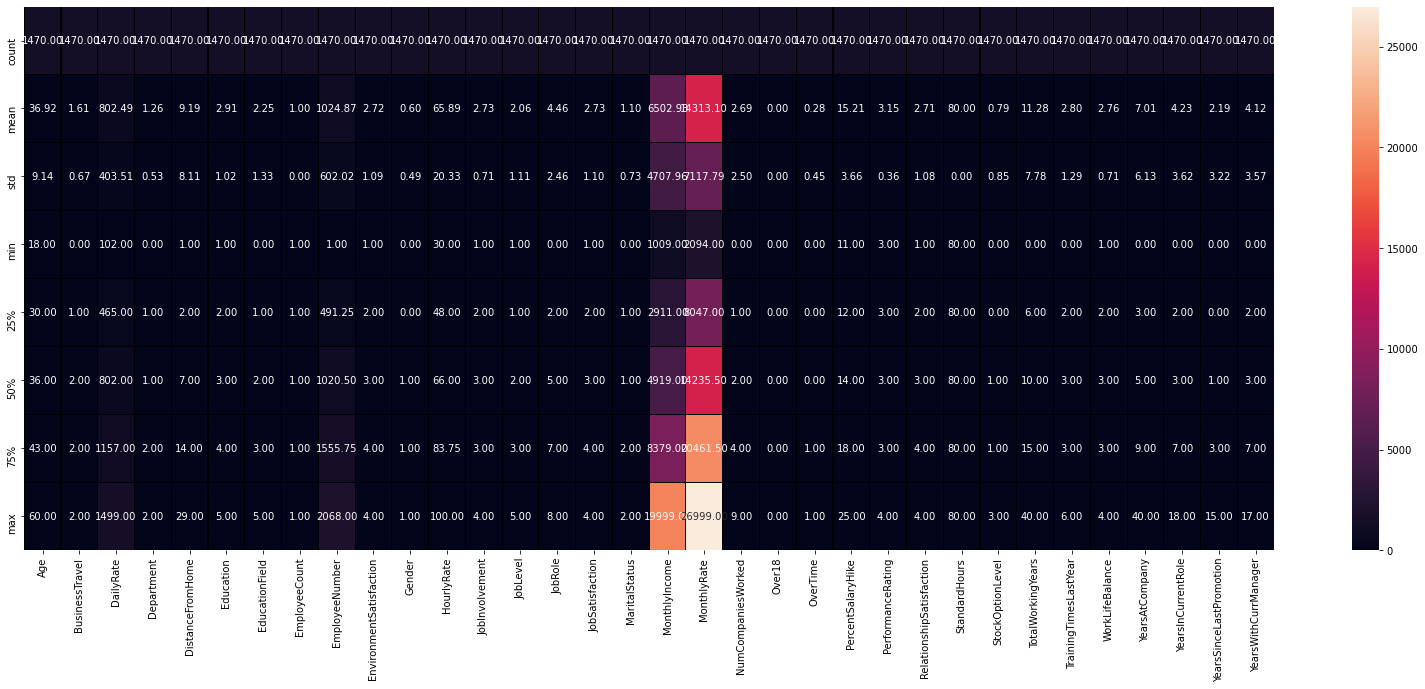

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28,10))
sns.heatmap(HR_Attrition.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Correlation of the columns with the target columns:

In [190]:
HR_Attrition.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,0.017621,1.000000,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

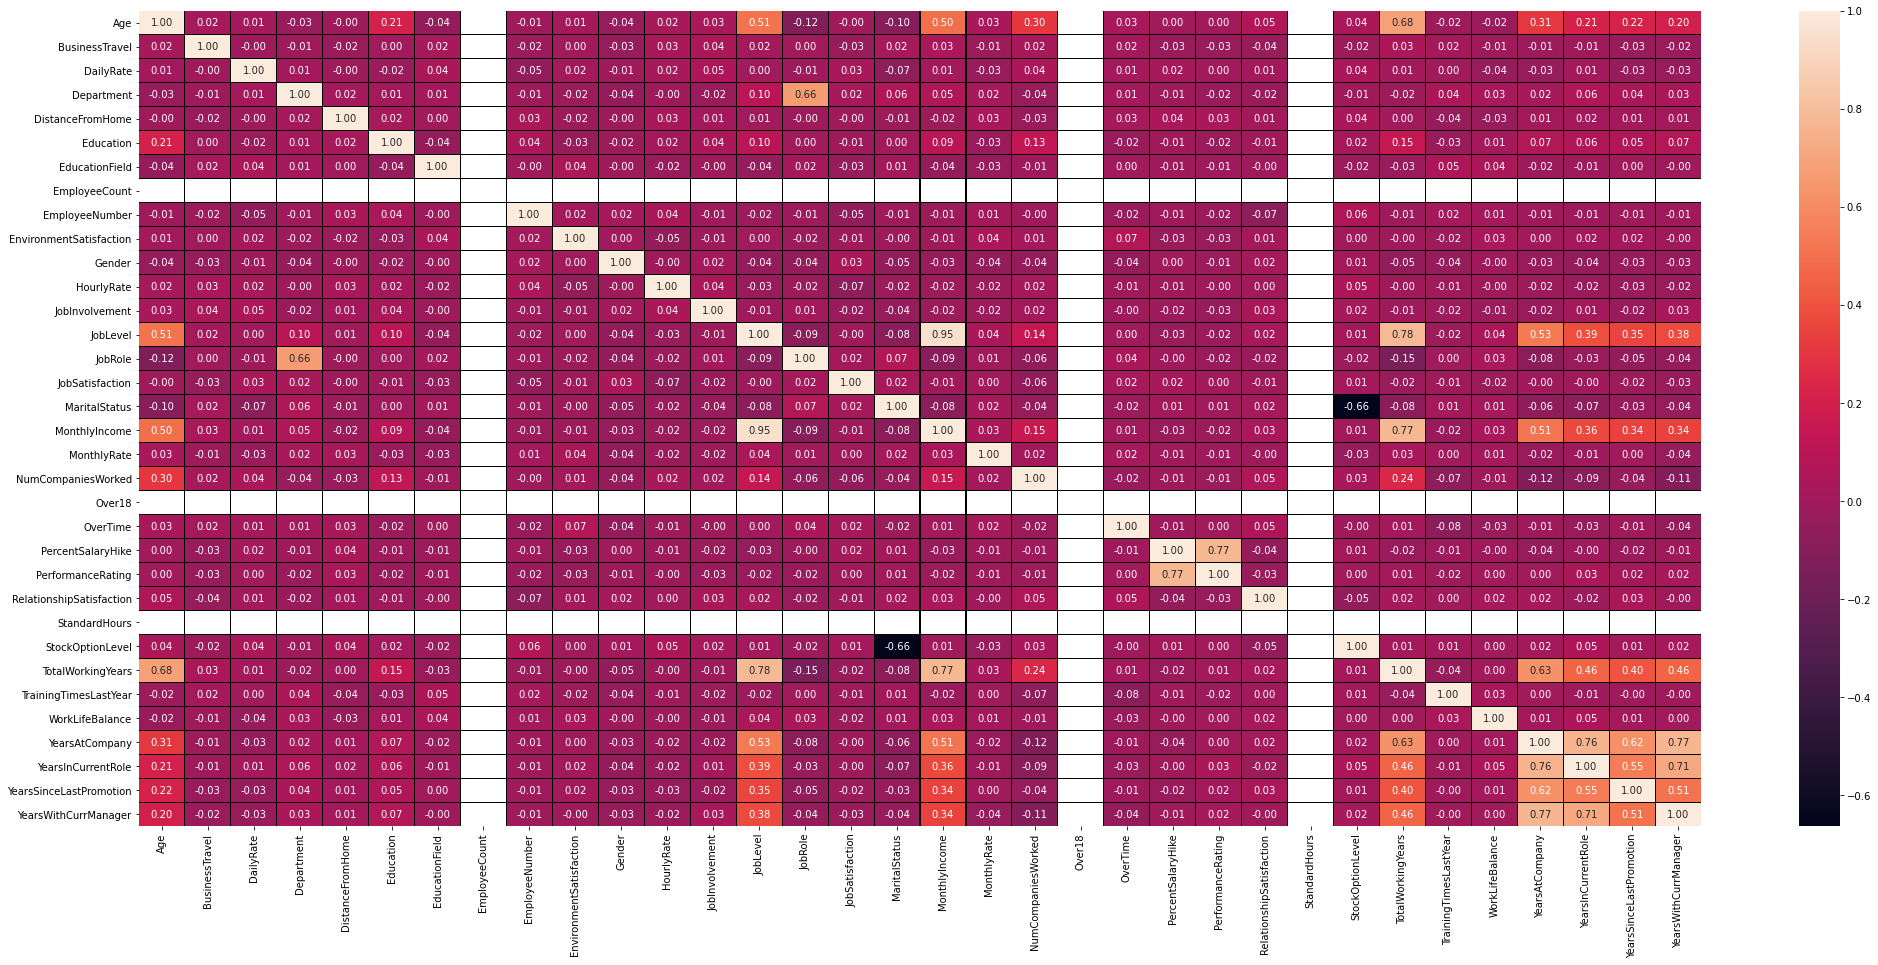

In [191]:
plt.figure(figsize=(35,15))
sns.heatmap(HR_Attrition.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

From the above correlation table and heatmap we can say that:

TotalWorkingYears and Age have positive correlation with value 0.680381

YearsSinceLastPromotion and YearsWithCurrManager have positive correlation with value 0.510224

YearsInCurrentRole and YearsWithCurrManager have positive correlation with value 0.714365

YearsAtCompany and YearsWithCurrManager have positive correlation with value 0.769212

YearsInCurrentRole and YearsSinceLastPromotion have positive correlation with value 0.548056

YearsAtCompany and YearsSinceLastPromotion have positive correlation with value 0.618409

YearsAtCompany and YearsSinceLastPromotion have positive correlation with value 0.618409

YearsAtCompany and YearsInCurrentRole have positive correlation with value 0.758754

YearsAtCompany and JobRole have positive correlation with value 0.534739

TotalWorkingYears and JobLevel have positive correlation with value 0.782208

TotalWorkingYears and MonthlyIncome have positive correlation with value 0.772893

Department and JobRole have positive correlation with value 0.662431


StockOptionLevel and MaritalStatus have negative correlation with value -0.662577



In [192]:
plt.figure(figsize=(22,7))
HR_Attrition.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

KeyError: 'Attrition'

<Figure size 1584x504 with 0 Axes>

## Considering Outlier Removal

In [193]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(HR_Attrition))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([33, 32, 30, 32, 31, 32, 27, 27, 30, 32, 31, 32, 33, 27, 30, 32, 33,
        32, 27, 33, 30, 31, 32, 31, 33, 30, 32, 27, 30, 31, 32, 32, 33, 27,
        30, 30, 32, 32, 27, 31, 30, 30, 32, 30, 33, 32, 30, 27, 30, 32, 33,
        27

In [194]:
HR_Attrition_new=HR_Attrition[(z<3).all(axis=1)]
HR_Attrition_new

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [195]:
HR_Attrition_new.shape

(0, 34)

In [196]:
HR_Attrition.shape

(1470, 34)

## Now checking for the skewness

In [197]:
HR_Attrition.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

Here we can find the positive skewness in 

DistanceFromHome with value=0.958118

EducationField with value=0.550371

JobLevel with value=1.025401

MonthlyIncome with value=1.369817

NumCompaniesWorked with value=1.026471

OverTime with value=0.964489

PercentSalaryHike with value=0.821128

PerformanceRating with value=1.921883

StockOptionLevel with value=0.968980

TotalWorkingYears with value=1.117172

TrainingTimesLastYear with value=0.553124

YearsAtCompany with value=1.764529

YearsInCurrentRole with value=0.917363

YearsSinceLastPromotion with value=1.984290

YearsWithCurrManager with value=0.833451

and negative skewness in:
    
BusinessTravel with value=-1.439006

WorkLifeBalance with value=-0.552480





## Skewness removal using Power_Transform method

In [198]:
from sklearn.preprocessing import power_transform
X=power_transform(HR_Attrition_x, method='yeo-johnson')
X

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [199]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Xscaled=SC.fit_transform(X)
Xscaled

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

### VIF for removing multicollinearity problem

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(Xscaled,i) for i in range(Xscaled.shape[1])]
vif["Features"]=HR_Attrition_x.columns
vif

,VIF,Features
0,2.104399,Age
1,1.012928,BusinessTravel
2,1.024583,DailyRate
3,2.027121,Department
4,1.012932,DistanceFromHome
5,1.070832,Education
6,1.027280,EducationField
7,NaN,EmployeeCount
8,1.025481,EmployeeNumber
9,1.020401,EnvironmentSatisfaction


Here we can say that the vif is very low for each column less than 5, only YearsAtCompany have vif=6.646797 


In [202]:
xtrain=HR_Attrition_x.drop(['YearsAtCompany'],axis=1)
xtrain

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,3,1,80,0,8,0,1,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,4,80,1,10,3,3,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,3,2,80,0,7,3,3,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,3,80,0,8,3,3,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,3,4,80,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,3,80,1,17,3,3,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,3,1,80,1,9,5,3,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,4,2,80,1,6,0,3,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,3,4,80,0,17,3,2,6,0,8


In [203]:
ytrain=HR_Attrition_y

## train_test_split

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print("accuracy score is",accu*100, "at random_state", i)

accuracy score is 76.74897119341564 at random_state 0
accuracy score is 75.7201646090535 at random_state 1
accuracy score is 77.57201646090535 at random_state 2
accuracy score is 79.62962962962963 at random_state 3
accuracy score is 75.92592592592592 at random_state 4
accuracy score is 76.5432098765432 at random_state 5
accuracy score is 79.83539094650206 at random_state 6
accuracy score is 78.18930041152264 at random_state 7
accuracy score is 78.80658436213992 at random_state 8
accuracy score is 76.95473251028807 at random_state 9
accuracy score is 79.01234567901234 at random_state 10
accuracy score is 80.65843621399176 at random_state 11
accuracy score is 79.42386831275721 at random_state 12
accuracy score is 79.01234567901234 at random_state 13
accuracy score is 78.60082304526749 at random_state 14
accuracy score is 75.51440329218107 at random_state 15
accuracy score is 76.13168724279835 at random_state 16
accuracy score is 79.21810699588477 at random_state 17
accuracy score is 75.3

In [205]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state", maxRS)

Best accuracy is  0.8231292517006803 on Random_state 37


In [206]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=1)


Now we are checking accuracy using various algorithm.

In [207]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [208]:
# Import Support vector classifier
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90       364
         1.0       0.00      0.00      0.00        77

    accuracy                           0.83       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.68      0.83      0.75       441



In [209]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
#RandomForestClassifier(100)----> Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8390022675736961
[[361   3]
 [ 68   9]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       364
         1.0       0.75      0.12      0.20        77

    accuracy                           0.84       441
   macro avg       0.80      0.55      0.56       441
weighted avg       0.83      0.84      0.79       441



In [210]:
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8684807256235828
[[349  15]
 [ 43  34]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       364
         1.0       0.69      0.44      0.54        77

    accuracy                           0.87       441
   macro avg       0.79      0.70      0.73       441
weighted avg       0.86      0.87      0.86       441



In [211]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8480725623582767
[[353  11]
 [ 56  21]]
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       364
         1.0       0.66      0.27      0.39        77

    accuracy                           0.85       441
   macro avg       0.76      0.62      0.65       441
weighted avg       0.83      0.85      0.82       441



In [212]:
GnB=GaussianNB()
GnB.fit(x_train,y_train)
predGnB=GnB.predict(x_test)
print(accuracy_score(y_test,predGnB))
print(confusion_matrix(y_test,predGnB))
print(classification_report(y_test,predGnB))

0.8276643990929705
[[324  40]
 [ 36  41]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       364
         1.0       0.51      0.53      0.52        77

    accuracy                           0.83       441
   macro avg       0.70      0.71      0.71       441
weighted avg       0.83      0.83      0.83       441



In [213]:
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.800453514739229
[[350  14]
 [ 74   3]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       364
         1.0       0.18      0.04      0.06        77

    accuracy                           0.80       441
   macro avg       0.50      0.50      0.48       441
weighted avg       0.71      0.80      0.74       441



## Cross-Validation-Score

In [214]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SV,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817
0.0016663195529137286


In [215]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85714286 0.86394558 0.86394558 0.8707483  0.84353741]
0.8598639455782312
0.00922765984098673


In [216]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83673469 0.87755102 0.87755102 0.8707483  0.84013605]
0.8605442176870749
0.01825361614285539


In [217]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84693878 0.87414966 0.86394558 0.86394558 0.86394558]
0.8625850340136054
0.008764693011377606


In [218]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GnB,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86734694 0.79591837 0.76530612 0.79931973 0.84693878]
0.8149659863945578
0.03698578835120596


In [219]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81632653 0.82312925 0.82653061 0.81632653 0.82312925]
0.8210884353741497
0.004081632653061229


So from the cross_validation score we find that the RandomForestClassifier model is performing best. So we will choose this model 

for further operation

## Hyper parameter tuning

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
parameter = {'n_estimators':np.arange(1,9),
            'max_depth':np.arange(2,10), 
            'min_samples_split':np.arange(1,7),
            'min_samples_leaf' :np.arange(3,9)}

In [222]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [223]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [224]:
GCV.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}

In [225]:
Final_model= RandomForestClassifier(max_depth = 7, min_samples_leaf = 3, min_samples_split = 5, n_estimators = 7)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

83.90022675736961


# AUC-ROC Curve


In [226]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

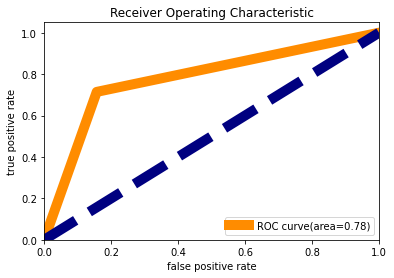

In [227]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Saving the Model


In [228]:
import joblib
joblib.dump(Final_model,"FinalModel_Evaluation2.pkl")

['FinalModel_Evaluation2.pkl']

# Conclusion

In [229]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
HR_Attrition_Final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
HR_Attrition_Final

,original,predicted
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
436,0.0,0.0
437,0.0,0.0
438,0.0,0.0
439,0.0,0.0
